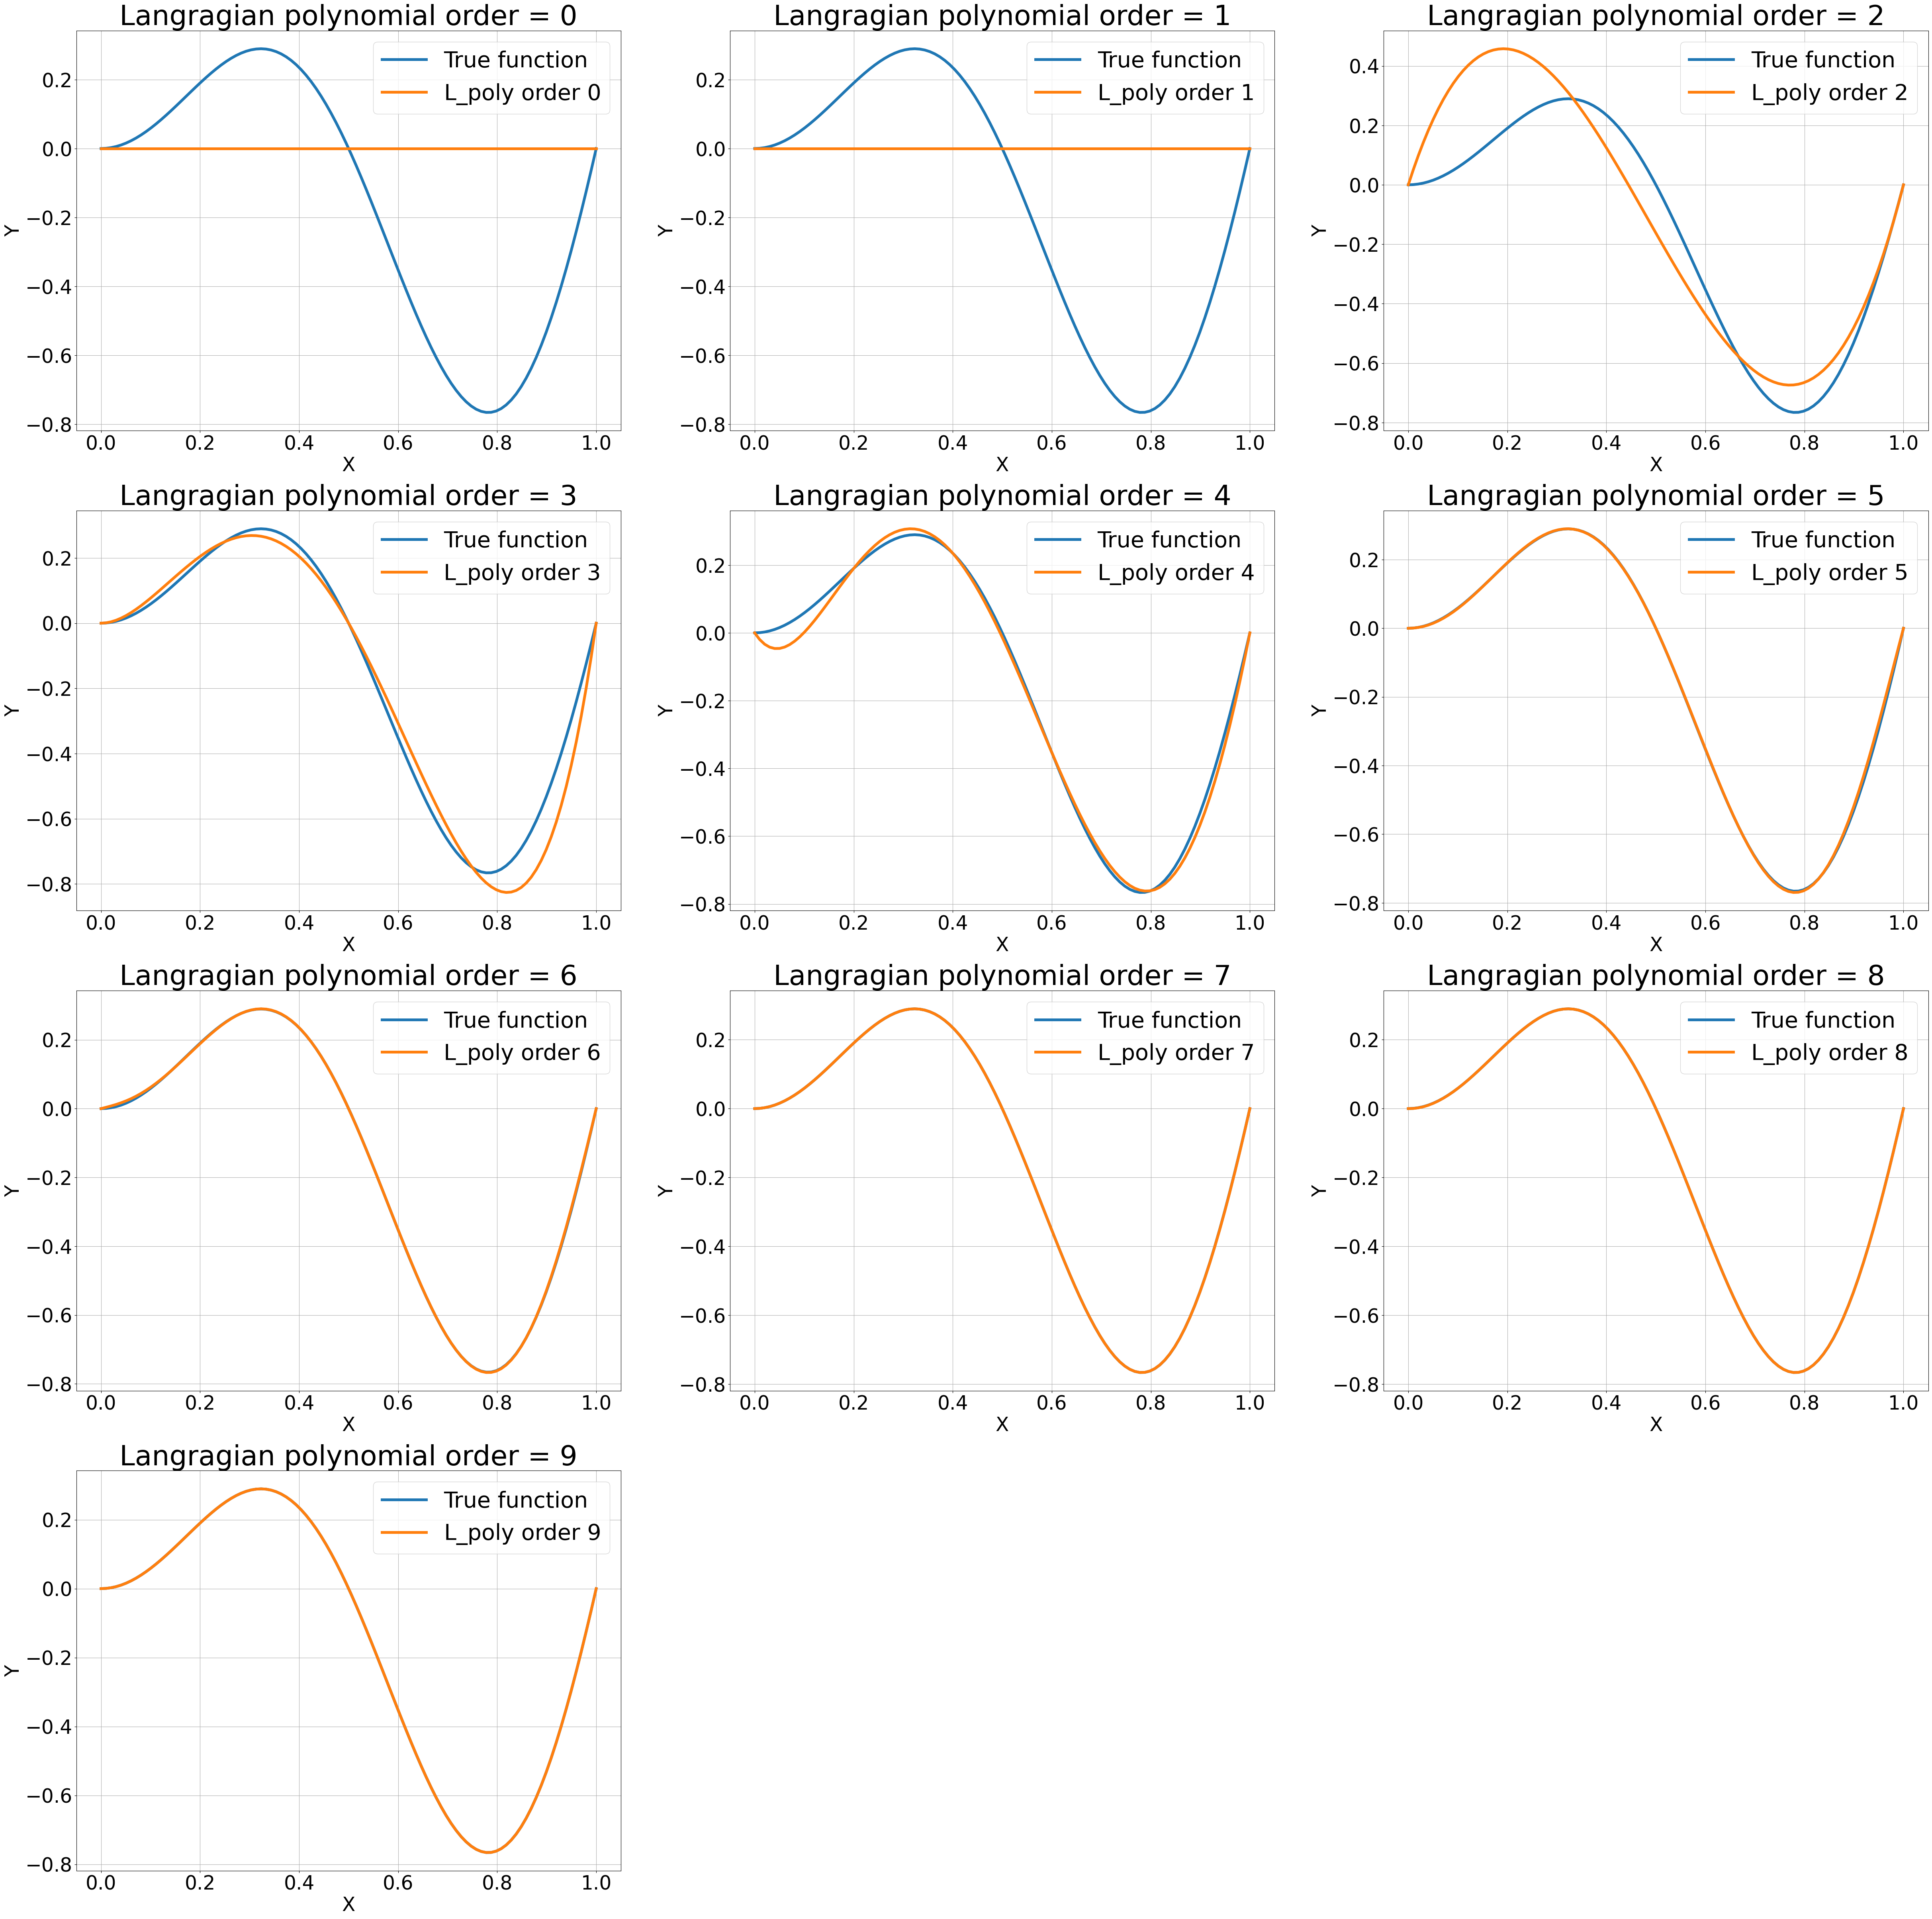

In [10]:
#Import libraries
import numpy as np
from scipy import integrate 
import matplotlib.pyplot as plt

#define the variables
l1 = 0
l2 = 1
omega = 2

#poly_order = 4 #if polynomial order is 1 then total number of nodes required is 1+1=2
poly_orders = np.arange(1,11)
graph_per_row = 3 #number of plots per row define by user
row = round((len(poly_orders)/graph_per_row))+1 #total numbers of rows
col = graph_per_row #total numbers of columns
fig = plt.figure(figsize=(60,60)) 

for poly_order in poly_orders:
    #define the original function
    u = lambda x:x*np.sin(np.pi*omega*x)
    nodes = np.linspace(l1,l2,poly_order+1)
    x = np.linspace(l1,l2,100)

    #define the generation of langragian basis
    def langragian_basis(x,nodes,i):
        result1 = np.ones_like(x)
        for j in range(len(nodes)):
            if j!=i:
                result1*=(x-nodes[j])/(nodes[i]-nodes[j])
        return result1

    #define the Summation of product of langragian basis and displacement for all the nodes are present
    def langragian_poly(x,nodes):
        result2 = np.zeros_like(x)
        for i in range(poly_order):
            result2 += u(nodes[i])*langragian_basis(x,nodes,i)
        return result2

    #approximate langragian function
    w_star = langragian_poly(x,nodes)

    plt.subplot(row,col,poly_order)
    plt.grid()
    plt.plot(x,u(x),linewidth = 5)
    plt.plot(x,w_star,linewidth = 5)
    plt.title("Langragian polynomial order = {}".format(poly_order-1),fontsize=50)
    plt.xlabel("X",fontsize=35)
    plt.ylabel("Y",fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    plt.legend(["True function","L_poly order {}".format(poly_order-1)],fontsize=40)
plt.savefig('./Assignment02.png')
plt.show()